In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import xarray as xr


In [5]:
base_ds = xr.open_dataset('../../data/nc_2round/base.nc')
fundamental_v0_ds = xr.open_dataset('../../data/nc_2round/fundamental_v0.nc')
market_ds = xr.open_dataset('../../data/nc_2round/market_brief.nc')


In [4]:
base_ds


<xarray.Dataset>
Dimensions:            (day: 1700, asset: 54, timeslot: 50)
Coordinates:
  * day                (day) int32 1 2 3 4 5 6 ... 1695 1696 1697 1698 1699 1700
  * asset              (asset) int32 0 1 2 3 4 5 6 7 ... 46 47 48 49 50 51 52 53
  * timeslot           (timeslot) int32 1 2 3 4 5 6 7 8 ... 44 45 46 47 48 49 50
Data variables: (12/14)
    open               (day, asset, timeslot) float64 ...
    close              (day, asset, timeslot) float64 ...
    high               (day, asset, timeslot) float64 ...
    low                (day, asset, timeslot) float64 ...
    volume             (day, asset, timeslot) float64 ...
    money              (day, asset, timeslot) float64 ...
    ...                 ...
    pe_ttm             (day, asset) float64 ...
    pe                 (day, asset) float64 ...
    pb                 (day, asset) float64 ...
    ps                 (day, asset) float64 ...
    pcf                (day, asset) float64 ...
    return             (day, asset) float64 ...

In [6]:
fundamental_v0_ds


<xarray.Dataset>
Dimensions:       (day: 1700, asset: 54)
Coordinates:
  * day           (day) int32 1 2 3 4 5 6 7 ... 1695 1696 1697 1698 1699 1700
  * asset         (asset) int32 0 1 2 3 4 5 6 7 8 ... 45 46 47 48 49 50 51 52 53
Data variables:
    earnings_ttm  (day, asset) float64 ...
    earnings      (day, asset) float64 ...
    book          (day, asset) float64 ...
    sales         (day, asset) float64 ...
    cashflow      (day, asset) float64 ...
    market_cap    (asset, day) float64 ...
    market_share  (asset) float64 ...

In [7]:
market_ds


<xarray.Dataset>
Dimensions:      (day: 1700, asset: 54)
Coordinates:
  * day          (day) int32 1 2 3 4 5 6 7 ... 1695 1696 1697 1698 1699 1700
  * asset        (asset) int32 0 1 2 3 4 5 6 7 8 ... 45 46 47 48 49 50 51 52 53
Data variables:
    avg_price    (day, asset) float64 ...
    volatility   (day, asset) float64 ...
    mean_volume  (day, asset) float64 ...
    close_0      (day, asset) float64 ...
    open_0       (day, asset) float64 ...
    high_0       (day, asset) float64 ...
    low_0        (day, asset) float64 ...
    return_0     (day, asset) float64 ...

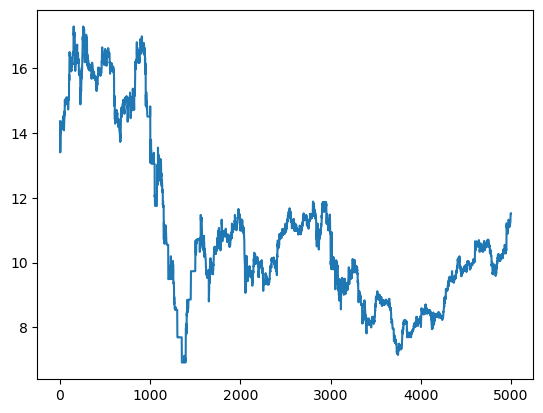

In [15]:
import matplotlib.pyplot as plt

close = base_ds.sel(asset=14)['close'].stack({'bucket': ('day', 'timeslot')}).as_numpy()
plt.plot(close[5000:10000])


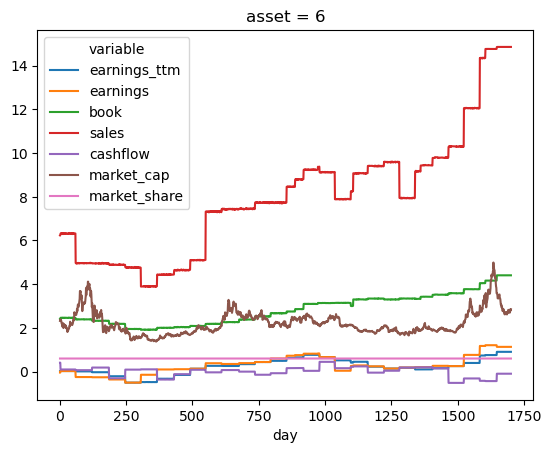

In [25]:
fundamental_v0_ds.sel(asset=6).to_array().plot.line(x='day')


(array([52.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.68836826,  31.69650697,  62.70464569,  93.71278441,
        124.72092313, 155.72906184, 186.73720056, 217.74533928,
        248.753478  , 279.76161671, 310.76975543]),
 <BarContainer object of 10 artists>)

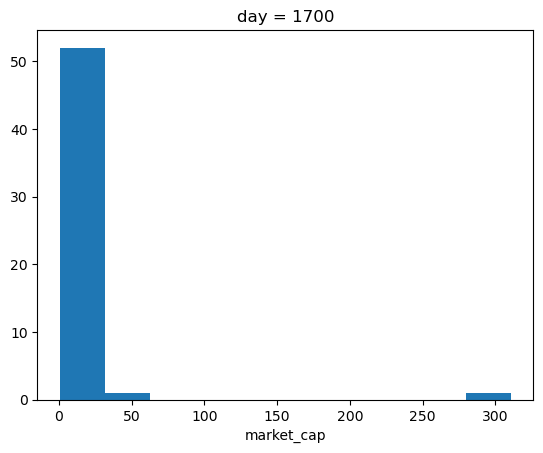

In [36]:
fundamental_v0_ds['market_cap'].isel(day=-1).plot.hist()
